# Assignment 07

Erik Strand <br> 24 March 2021

## In this assignment, you will review additional clustering algorithms.
__Please submit a python script and markdown using Jupyter notebook (.ipynb file) with your submission. Provide step-by-step code for partial credits and do not forget to run your code before submitting.__

## About data
This homework assignment concerns NYPD police stops in New York City in the years 2011-2012 where the suspected crime was CPW (criminal possession of a weapon).  You can read more about these stops at 
* https://en.wikipedia.org/wiki/Terry_stop 
* https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

In [1]:
# Load modules and libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

# 1. Find unique data points through clustering
You are given 1,069 stop records in the file __‘original_with_duplicates_noid.csv’__, but unfortunately technical errors have resulted in some exact duplicate records.  You know there are around 1,000 unique stops in the file (there may be slightly more or slightly fewer).

## (1) Use a clustering technique of your choice to determine how many unique records there are.
You may use any clustering algorithms (kmeans, agglomerative, gaussian, dbscan, or any others) of your choice to complete this assignment. __Be innovative for this questions!__
If you use kmeans, you may use 'score' function which returns a remaining distance between the data samples and their associated cluster centers, and the objective of our minimization is that distance (sum of all distances). 

In [2]:
data = pd.read_csv("../data/original_with_duplicates_noid.csv")

print(data.columns)
print(type(data['year'][1]))
print(len(data))

data = data.select_dtypes(include='int64')

data.head()

Index(['year', 'found.weapon', 'found.gun', 'arrested', 'suspect.race',
       'suspect.age', 'suspect.build', 'suspect.sex', 'suspect.height',
       'suspect.weight', 'stopped.bc.desc', 'stopped.bc.violent',
       'stopped.bc.other', 'stopped.bc.object', 'stopped.bc.casing',
       'stopped.bc.lookout', 'stopped.bc.drugs', 'stopped.bc.clothing',
       'stopped.bc.furtive', 'stopped.bc.bulge', 'precinct', 'inside.outside',
       'location.housing', 'observation.period', 'officer.uniform',
       'additional.report', 'additional.investigation', 'additional.proximity',
       'additional.evasive', 'additional.associating', 'additional.direction',
       'additional.highcrime', 'additional.time', 'additional.sights',
       'additional.other', 'radio.run', 'day', 'month', 'time.period'],
      dtype='object')
<class 'numpy.int64'>
1069


,year,suspect.age,suspect.weight,precinct,observation.period,time.period
0,2012,27,180,30,1,6
1,2011,40,225,72,1,6
2,2012,20,200,32,5,6
3,2011,23,180,75,1,1
4,2011,33,175,42,2,4


In [3]:
pca = PCA(n_components=2).fit(data)
print("Total variance of the data (original 6D :", np.sum(np.var(data,axis=0)))
print("Variance explained via the first and second components:\n" , pca.explained_variance_)
print("Variance explained via the first and second components (ratio):\n", pca.explained_variance_ratio_)

Total variance of the data (original 6D : 1760.6556244044025
Variance explained via the first and second components:
 [867.49724615 788.73464842]
Variance explained via the first and second components (ratio):
 [0.49225171 0.44755875]


In [4]:
X_pca = pca.transform(data) 
print("Original shape: {}".format(str(data.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (1069, 6)
Reduced shape: (1069, 2)


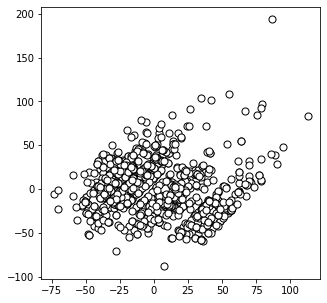

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(X_pca[:,0], X_pca[:,1],
           c='white', marker='o',
           edgecolor='black', s=50)

In [6]:
scores = []

for i in range(975, 1010):
    km = KMeans(
        n_clusters=i,
        n_init=10, random_state=0
    )
    group_km = km.fit(X_pca)
    scores.append(km.score(X_pca, group_km))
    
print(scores)

[-0.0002954366305800704, -0.00023651743876484943, -0.00019854077791592317, -0.00016056411718068375, -0.00014364413252110353, -0.00012677867394472742, -0.00011063345496609145, -9.458222999114696e-05, -7.904543352310611e-05, -6.367552097685802e-05, -4.894572336411329e-05, -3.910897939363167e-05, -2.9272235707367145e-05, -2.1894677416867125e-05, -1.59411129345699e-05, -1.040794407458634e-05, -7.658818532263467e-06, -4.90969372890504e-06, -2.450508276297114e-06, -1.4181378844568826e-06, -6.4386003373329e-07, -2.906350005105196e-08, -3.97051280742744e-11, -3.97051280742744e-11, -3.97051280742744e-11, -3.97051280742744e-11, -3.97051280742744e-11, -3.97051280742744e-11, -3.97051280742744e-11, -3.97051280742744e-11, -3.97051280742744e-11, -3.97051280742744e-11, -3.97051280742744e-11, -3.97051280742744e-11, -3.97051280742744e-11]


In [7]:
scores = np.absolute(scores)
print(scores)
print(np.amin(scores))
print(np.where(scores == np.amin(scores)))

[2.95436631e-04 2.36517439e-04 1.98540778e-04 1.60564117e-04
 1.43644133e-04 1.26778674e-04 1.10633455e-04 9.45822300e-05
 7.90454335e-05 6.36755210e-05 4.89457234e-05 3.91089794e-05
 2.92722357e-05 2.18946774e-05 1.59411129e-05 1.04079441e-05
 7.65881853e-06 4.90969373e-06 2.45050828e-06 1.41813788e-06
 6.43860034e-07 2.90635001e-08 3.97051281e-11 3.97051281e-11
 3.97051281e-11 3.97051281e-11 3.97051281e-11 3.97051281e-11
 3.97051281e-11 3.97051281e-11 3.97051281e-11 3.97051281e-11
 3.97051281e-11 3.97051281e-11 3.97051281e-11]
3.97051280742744e-11
(array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),)


The minimum KMeans score occurs with 997 (975 + 22) or more clusters. Therefore, we can assume that there are 997 unique values in this dataset. 

## (2) Check your work by looking for row-wise duplicates using any technique of your choice (this should be straightforward).  How well did your clustering technique perform?
Hint: use a pandas function.

In [8]:
data_unique = data.drop_duplicates()

print(len(data_unique))

997


My KMeans clustering technique perfectly predicted the number of unique values in this dataset. 

# 2. Clustering and visualization
You are given records for all recorded CPW stops made in New York City during 2012 in the file __‘cpw_stops_2012.csv’__.  Each record includes the lat/long of the stop and the month, day, and time period (this feature has six values, where each corresponds to a four-hour time period.  For example, time.period = 1 means the stop occurred between midnight and 4am, and time.period = 2 means the stop occurred between 4am and 8am). Explore “hot-spots” of CPW stops by applying clustering methods based on __space (2D), or space and time (3D)__.  In particular,
## (1) Apply at least two different clustering algorithms to the data.
* You may use any clustering algorithms (kmeans, agglomerative, gaussian, dbscan, or any others) of your choice to complete this assignment.
* You can run clustering based on either 1) lat/lon level or 2) aggregated spatial unit level if you want (e.g. zipcode).

In [9]:
cpw = pd.read_csv("../data/cpw_stops_2012.csv")

cpw = cpw.replace({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})
cpw = cpw.replace(
    {'January': 1, 
     'February': 2, 
     'March': 3, 
     'April': 4, 
     'May': 5, 
     'June': 6, 
     'July': 7, 
     'August': 8, 
     'September': 9, 
     'October': 10, 
     'November': 11, 
     'December': 12
})

cpw = cpw[['lat', 'lon', 'time.period']]

cpw.head(10)

,lat,lon,time.period
0,40.829234,-73.875506,6
1,40.812185,-73.938034,1
2,40.840865,-73.885549,1
3,40.577244,-74.000032,1
4,40.834126,-73.916660,5
5,40.646686,-73.954127,6
6,40.657282,-73.928054,5
7,40.833315,-73.926371,6
8,40.727090,-73.976639,1
9,40.839552,-73.915942,5


In [10]:
zipcode = gpd.read_file("../data/zipcode")
cpw = gpd.GeoDataFrame(cpw, geometry=gpd.points_from_xy(cpw.lon, cpw.lat))
cpw = cpw.set_crs(epsg=4326)
cpw = cpw.to_crs(epsg=2263)

df = gpd.sjoin(cpw, zipcode, op='within')
df = df[['label', 'MODZCTA']].groupby('MODZCTA').count()
df.head()

,label
MODZCTA,
10001,298
10002,779
10003,205
10004,37
10005,7


In [11]:
km = KMeans(n_clusters=4, random_state=0)
group_km = km.fit_predict(df)
df['group_km'] = group_km

df.head()

,label,group_km
MODZCTA,,
10001,298,2
10002,779,0
10003,205,2
10004,37,2
10005,7,2


In [12]:
gmm = GaussianMixture(n_components=4, covariance_type='full')
gmm.fit(df)
probs = gmm.predict_proba(df)
print (probs.shape)
print(probs[:5].round(3))

(177, 4)
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [13]:
labels = gmm.predict(df) 
df['group_gm'] = labels
df.head()

,label,group_km,group_gm
MODZCTA,,,
10001,298,2,0
10002,779,0,3
10003,205,2,0
10004,37,2,0
10005,7,2,0


## (2) Plot clusters on a map of New York City.
* If you work on the zipcode level analysis, please use zipcode shapefile used for the last assignment - New York City zipcode data (You will need to download a shapdfile here https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u or you can use 'nyc-zip-code-tabulation-areas-polygons.geojson').
* Just for your reference, the lat/lon level and the zipcode level visualizations would be as follows (you will have different pattern depending on your algorithms and parameters):
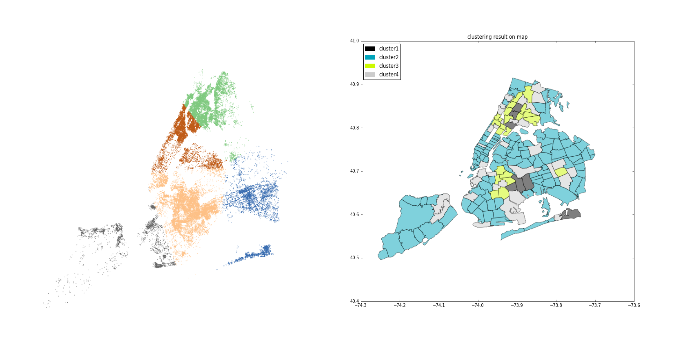

In [14]:
df = pd.merge(zipcode, df[['group_km', 'group_gm', 'label']], on='MODZCTA')

df.head()

,MODZCTA,label_x,geometry,group_km,group_gm,label_y
0,10001,"10001, 10118","POLYGON ((987646.000 210360.000, 987522.000 21...",2,0,298
1,10002,10002,"POLYGON ((985342.000 197658.000, 985336.000 19...",0,3,779
2,10003,10003,"POLYGON ((987412.000 202684.000, 987400.000 20...",2,0,205
3,10004,10004,"MULTIPOLYGON (((982030.000 197212.000, 981958....",2,0,37
4,10005,10005,"POLYGON ((982126.000 195468.000, 982080.000 19...",2,0,7


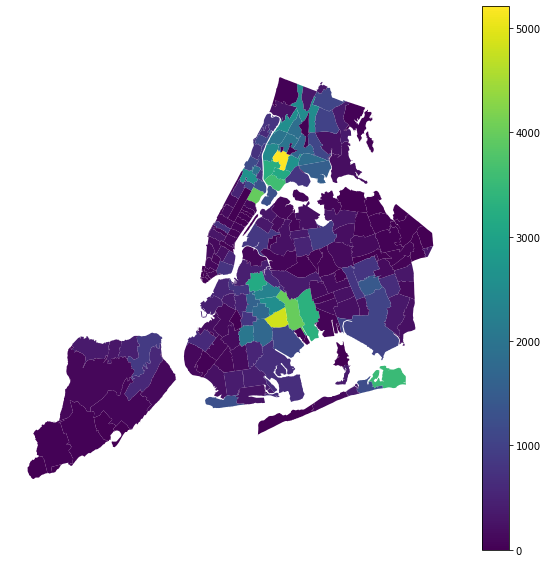

In [15]:
ax = df.plot(column='label_y', legend=True, categorical=False, cmap='viridis',figsize=(10,10))
#plt.title("Economic trends in NYC, 1994-2013")
plt.axis(False)
plt.show()

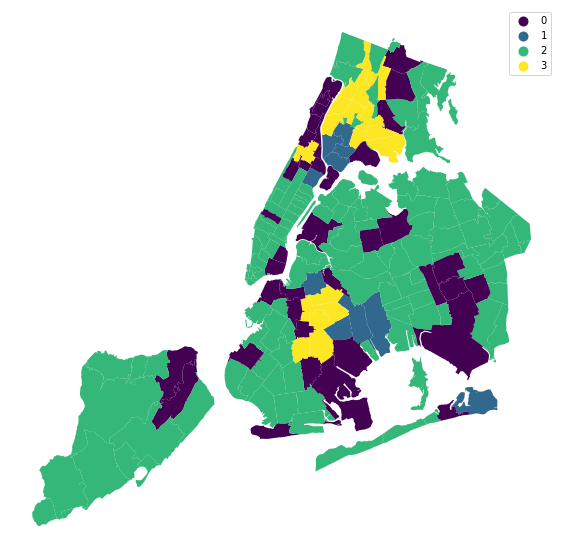

In [16]:
ax = df.plot(column='group_km', legend=True, categorical=True, cmap='viridis',figsize=(10,10))
#plt.title("Economic trends in NYC, 1994-2013")
plt.axis(False)
plt.show()

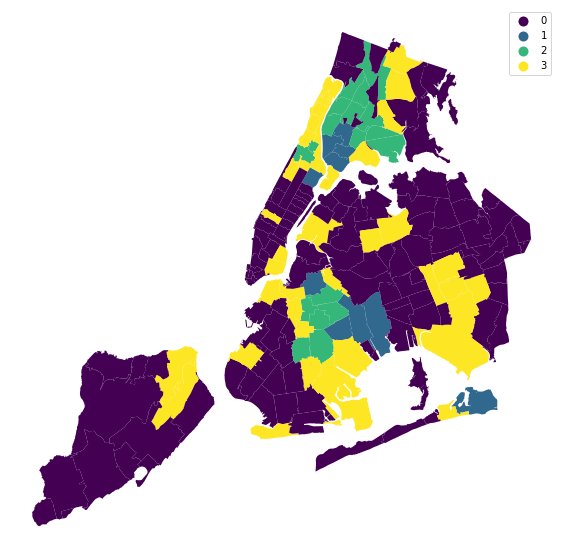

In [17]:
ax = df.plot(column='group_gm', legend=True, categorical=True, cmap='viridis',figsize=(10,10))
#plt.title("Economic trends in NYC, 1994-2013")
plt.axis(False)
plt.show()

## (3) Write a paragraph(s) explaining which clustering methods you chose and the parameters you used (and why you used those parameters).  Do your results make sense? 
This question is deliberately open-ended.  You will be evaluated on whether or not you made an effort to understand the data, successfully applied different clustering algorithms, and made at least one plot.

I chose to use KMeans and Gaussian clustering methods because I find them to be the most comprehensible methods. Although I experimented with including time in my analysis, I ended up using only the spatial distribution of stops in my clustering analysis. Since the clustering algorithms are essentially a black box, the groups produced by a method that included both space and time were largely unintelligible and produced no meaningful findings about the spatial and temporal relationships of stops. By contrast, clustering by the number of stops in each zip code is much more useful - the resulting map shows where the most and fewest stops took place, which is an easily understandable finding. Neighborhoods in the South Bronx and East Brooklyn have the highest stop rates, while much of the city including most of Staten Island and Lower Manhattan have the lowest. Although the KMeans and Gaussian clustering algorithms group zip codes slightly differently, both generally agree on these distributions. 